In [ ]:
#!pip install ..

!pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.13
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.2.24.0.34.4
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread            

In [2]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')


my_local_drive='/content/gdrive/My Drive/Colab Notebooks/PROJET_ML'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/PROJET_ML


'/content/gdrive/My Drive/Colab Notebooks/PROJET_ML'

### Lecture du fichier afin de prendre connaissances des données

In [4]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [5]:
print("Taille du DataFrame :", df.shape) # nb de lignes et colonnes

print("\nSix premières lignes :\n")
display(df.head(6))

print("\nTrois dernières lignes :\n")
display(df.tail(3))

print("\nCinq lignes au hasard :\n")
display(df.sample(5))



Taille du DataFrame : (1140, 7)

Six premières lignes :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0
5,6,331396203700944896,The Impact of Infertility on You and Your Rela...,0,0.0,0.0,0.0



Trois dernières lignes :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
1137,1258,1341155832793165825,Whats the uber support team email address?,0,0.0,0.0,0.0
1138,1259,1344167355648241664,House passes bill to increase stimulus checks ...,0,0.0,0.0,0.0
1139,1260,1344485313222041600,@berriemoomin #런쥔을_공평하게_대하세요 Renjun deserve be...,0,0.0,0.0,0.0



Cinq lignes au hasard :



,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
512,556,803346646570594304,5 techniques every agent should be using to ge...,0,0.0,0.0,0.0
424,459,732559294089072641,The only true love at the first sight is the l...,0,0.0,0.0,0.0
505,549,795711462819983360,Collaborative Care & Support Planning a key ap...,1,1.0,1.0,1.0
154,168,496661452892430336,U.S. Attorney/DEA to announce results of inves...,0,0.0,0.0,0.0
687,759,951053751187488769,Green Manuring to a Better Soil Physical Condi...,1,1.0,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1140 non-null   int64  
 1   tweet_id              1140 non-null   int64  
 2   text                  1140 non-null   object 
 3   science_related       1140 non-null   int64  
 4   scientific_claim      1140 non-null   float64
 5   scientific_reference  1140 non-null   float64
 6   scientific_context    1140 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 62.5+ KB


In [7]:
nb_SC = df[df["science_related"] == 1]["science_related"].count()
nb_non_SC = df[df["science_related"] == 0]["science_related"].count()

display(f"Nombre de tweets scientifiques : {nb_SC} ")
display(f"Nombre de tweets non scientifiques : {nb_non_SC}")

'Nombre de tweets scientifiques : 375 '

'Nombre de tweets non scientifiques : 765'

In [8]:
sc_bool = df[df["science_related"] == 1]

nb_claim = sc_bool[sc_bool["scientific_claim"] == 1.0]["tweet_id"].count()
nb_ref = sc_bool[sc_bool["scientific_reference"] == 1.0]["tweet_id"].count()
nb_context = sc_bool[sc_bool["scientific_context"] == 1.0]["tweet_id"].count()

nb_claim_ref = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()
nb_claim_context = sc_bool[(sc_bool["scientific_claim"] == 1.0) & (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()
nb_context_ref = sc_bool[(sc_bool["scientific_context"] == 1.0) & (sc_bool["scientific_reference"] == 1.0)]["tweet_id"].count()

nb_total = sc_bool[(sc_bool["scientific_claim"] == 1.0) |
                   (sc_bool["scientific_reference"] == 1.0) |
                   (sc_bool["scientific_context"] == 1.0)]["tweet_id"].count()


print(f"Nombre de tweets CLAIM : {nb_claim}")
print(f"Nombre de tweets REFERENCE : {nb_ref}")
print(f"Nombre de tweets CONTEXT : {nb_context}")
print(f"Nombre de tweets CLAIM & REF : {nb_claim_ref}")
print(f"Nombre de tweets CLAIM & CONTEXT : {nb_claim_context}")
print(f"Nombre de tweets CONTEXT & REF : {nb_context_ref}")
print(f"Nombre total de tweets ayant au moins une catégorie : {nb_total}")




Nombre de tweets CLAIM : 263
Nombre de tweets REFERENCE : 203
Nombre de tweets CONTEXT : 251
Nombre de tweets CLAIM & REF : 124
Nombre de tweets CLAIM & CONTEXT : 139
Nombre de tweets CONTEXT & REF : 203
Nombre total de tweets ayant au moins une catégorie : 375


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vérifier la présence de valeurs manquantes et les supprimer si nécessaire
df.dropna(subset=['text'], inplace=True)

# Sélectionner les colonnes nécessaires
X_text = df['text']  # Les tweets
y = df['science_related']  # Les labels (scientifique ou non)

# Création de la matrice TF-IDF
vectorizer = TfidfVectorizer()  # Initialisation du vectorizer
X_tfidf = vectorizer.fit_transform(X_text)  # Transformation des tweets en vecteurs TF-IDF

# Afficher la forme de la matrice résultante
print("Taille de la matrice TF-IDF :", X_tfidf.shape)



Taille de la matrice TF-IDF : (1140, 7969)


In [11]:
# Conversion de la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher un extrait de la matrice TF-IDF
print("Aperçu de la matrice TF-IDF (5 premières lignes) :")
display(tfidf_df.head())  # Utilisation de display() pour bien formater l'affichage dans Jupyter


Aperçu de la matrice TF-IDF (5 premières lignes) :


,000,01,049,07904567432a,093,0cmzimdaje,0hitnsx0c4,0iwaxgdpww,0jlkmseyhp,0oup8eayxh,...,ᴸᴼᵛᴱ,ᴼᴺ,ᴼᴼᴴ,ᵀᴴᴵˢ,ᵞᴼᵁ,ᶜᴴᴬᴿᴬᶜᵀᴱᴿ,逃げ恥,音樂,더쇼,런쥔을_공평하게_대하세요
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


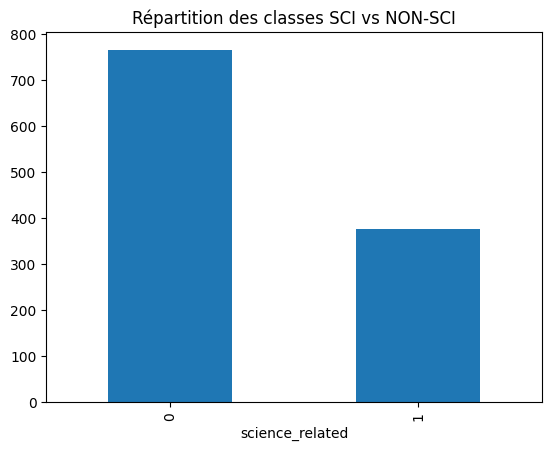

In [12]:
df['science_related'].value_counts().plot(kind='bar', title="Répartition des classes SCI vs NON-SCI")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille du jeu de test : {X_test.shape[0]} échantillons")


Taille du jeu d'entraînement : 912 échantillons
Taille du jeu de test : 228 échantillons



Naïve Bayes - Accuracy : 0.69
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       153
           1       1.00      0.07      0.12        75

    accuracy                           0.69       228
   macro avg       0.84      0.53      0.47       228
weighted avg       0.79      0.69      0.59       228

[[153   0]
 [ 70   5]]


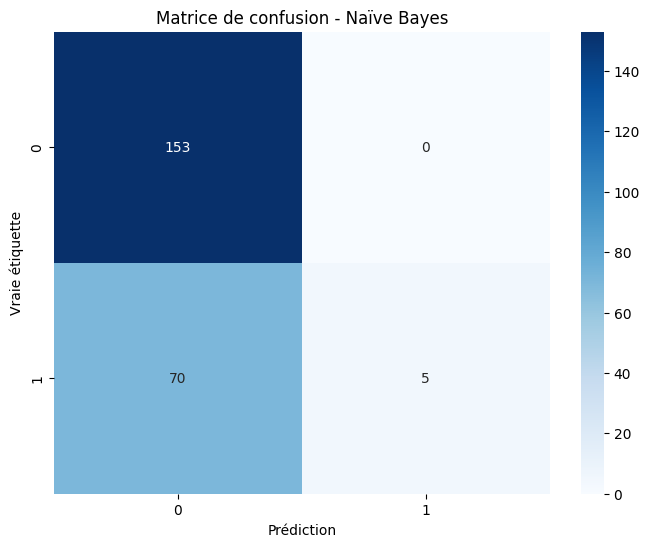

--------------------------------------------------

Logistic Regression - Accuracy : 0.71
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       153
           1       0.91      0.13      0.23        75

    accuracy                           0.71       228
   macro avg       0.80      0.56      0.53       228
weighted avg       0.77      0.71      0.63       228

[[152   1]
 [ 65  10]]


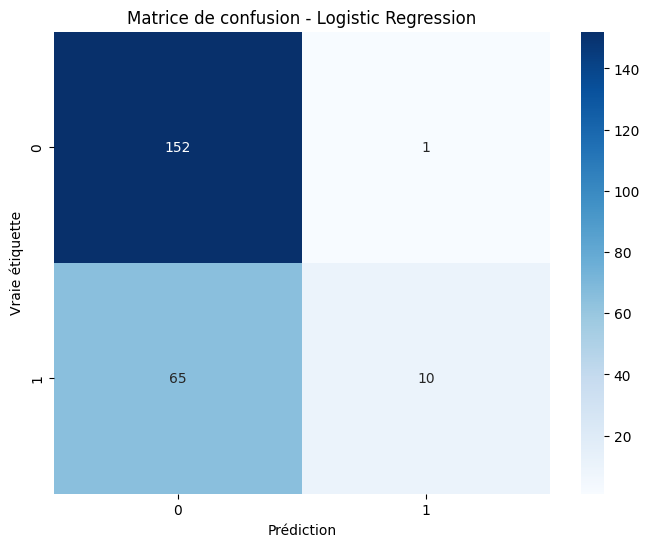

--------------------------------------------------

Random Forest - Accuracy : 0.73
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       153
           1       0.94      0.20      0.33        75

    accuracy                           0.73       228
   macro avg       0.83      0.60      0.58       228
weighted avg       0.79      0.73      0.67       228

[[152   1]
 [ 60  15]]


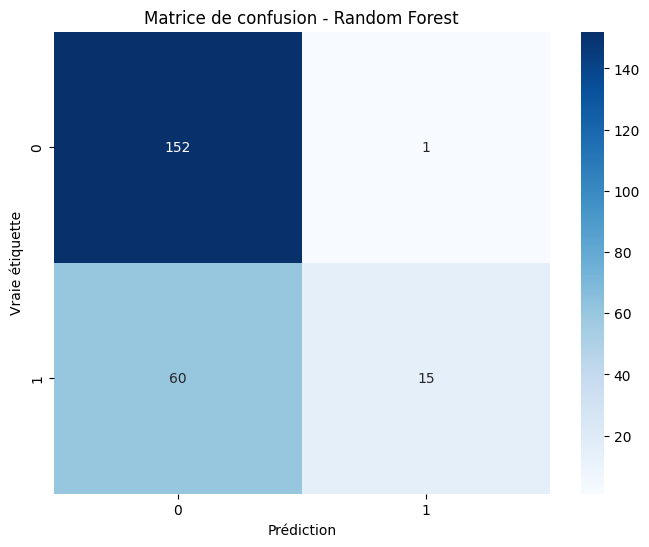

--------------------------------------------------

SVM sans params - Accuracy : 0.71
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       153
           1       1.00      0.11      0.19        75

    accuracy                           0.71       228
   macro avg       0.85      0.55      0.51       228
weighted avg       0.80      0.71      0.61       228

[[153   0]
 [ 67   8]]


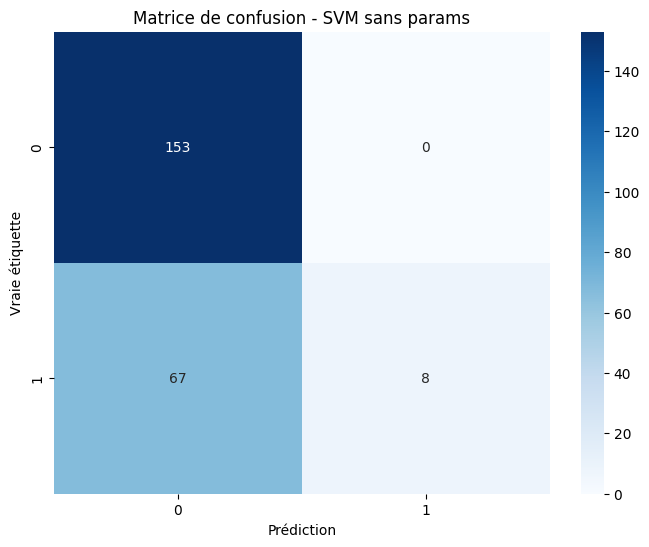

--------------------------------------------------

SVM - Accuracy : 0.81
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       153
           1       0.90      0.47      0.61        75

    accuracy                           0.81       228
   macro avg       0.84      0.72      0.74       228
weighted avg       0.82      0.81      0.79       228

[[149   4]
 [ 40  35]]


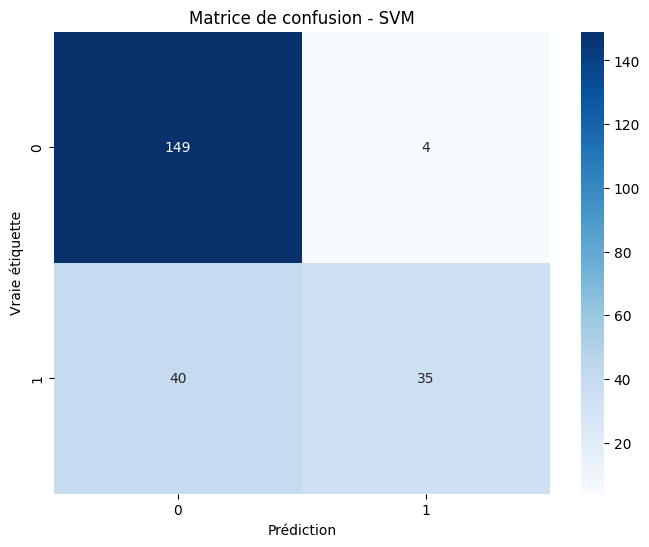

--------------------------------------------------

Decision Tree - Accuracy : 0.75
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       153
           1       0.65      0.52      0.58        75

    accuracy                           0.75       228
   macro avg       0.72      0.69      0.70       228
weighted avg       0.74      0.75      0.74       228

[[132  21]
 [ 36  39]]


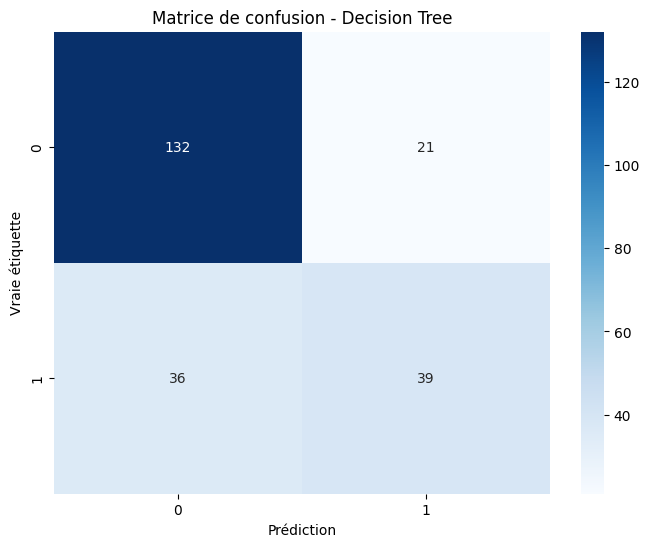

--------------------------------------------------

K-Nearest Neighbors sans param - Accuracy : 0.75
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.64      0.51      0.57        75

    accuracy                           0.75       228
   macro avg       0.71      0.68      0.69       228
weighted avg       0.74      0.75      0.74       228

[[132  21]
 [ 37  38]]


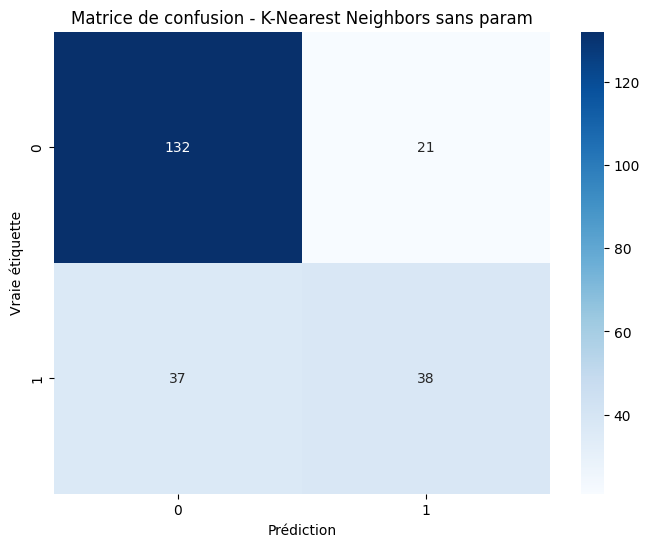

--------------------------------------------------

K-Nearest Neighbors - Accuracy : 0.75
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.64      0.51      0.57        75

    accuracy                           0.75       228
   macro avg       0.71      0.68      0.69       228
weighted avg       0.74      0.75      0.74       228

[[132  21]
 [ 37  38]]


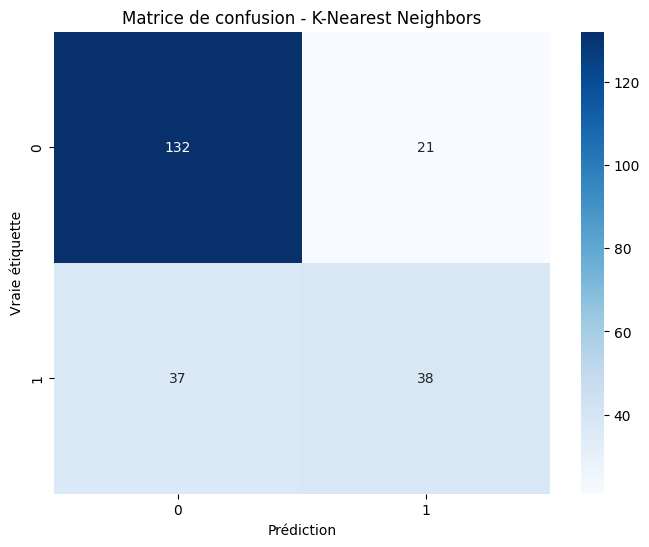

--------------------------------------------------

AdaBoost - Accuracy : 0.76
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       153
           1       0.86      0.33      0.48        75

    accuracy                           0.76       228
   macro avg       0.81      0.65      0.66       228
weighted avg       0.79      0.76      0.73       228

[[149   4]
 [ 50  25]]


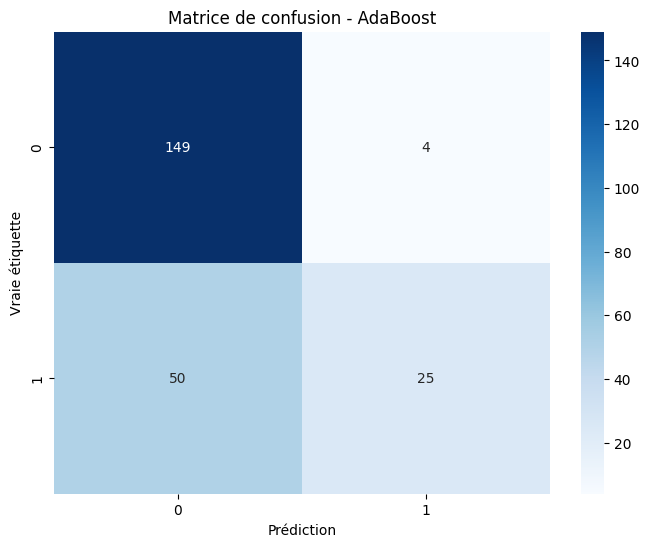

--------------------------------------------------

XGBoost sans params - Accuracy : 0.82
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       153
           1       0.77      0.63      0.69        75

    accuracy                           0.82       228
   macro avg       0.80      0.77      0.78       228
weighted avg       0.81      0.82      0.81       228

[[139  14]
 [ 28  47]]


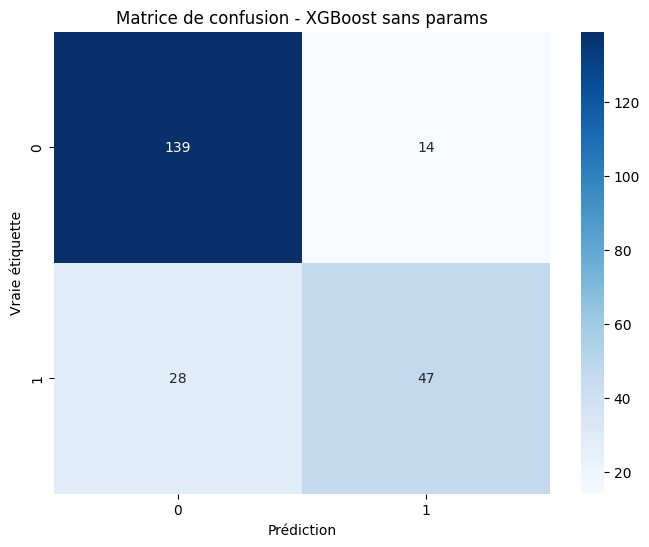

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy : 0.82
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       153
           1       0.77      0.63      0.69        75

    accuracy                           0.82       228
   macro avg       0.80      0.77      0.78       228
weighted avg       0.81      0.82      0.81       228

[[139  14]
 [ 28  47]]


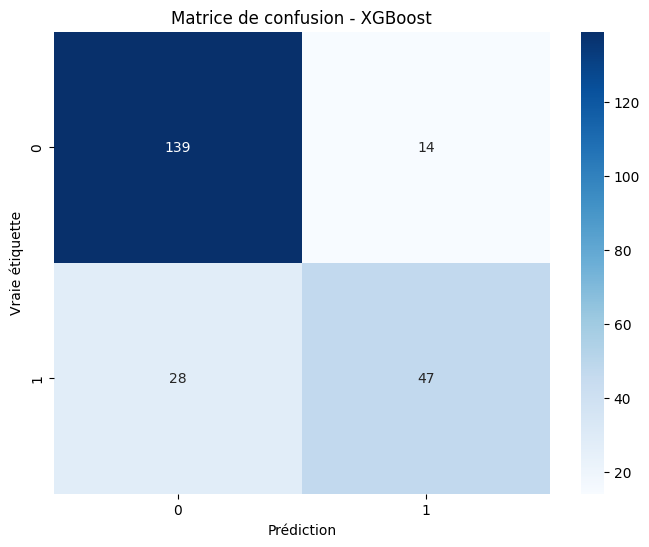

--------------------------------------------------

Neural Network - MLP sans params - Accuracy : 0.79
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       153
           1       0.78      0.52      0.62        75

    accuracy                           0.79       228
   macro avg       0.79      0.72      0.74       228
weighted avg       0.79      0.79      0.78       228

[[142  11]
 [ 36  39]]


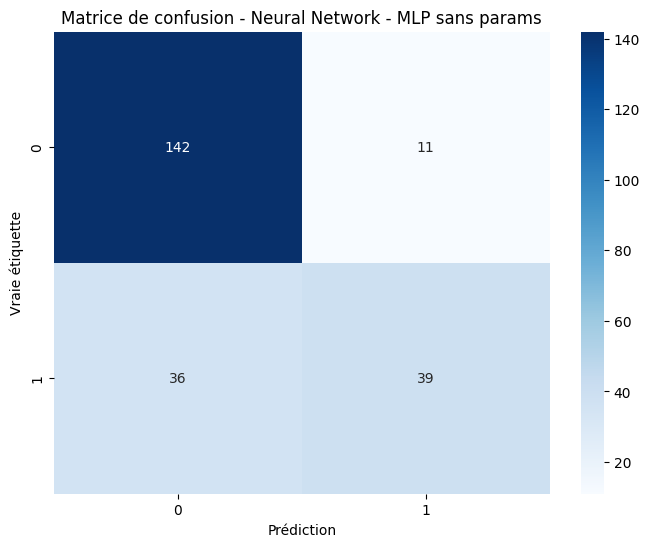

--------------------------------------------------

Neural Network - MLP - Accuracy : 0.79
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       153
           1       0.80      0.49      0.61        75

    accuracy                           0.79       228
   macro avg       0.80      0.72      0.74       228
weighted avg       0.80      0.79      0.78       228

[[144   9]
 [ 38  37]]


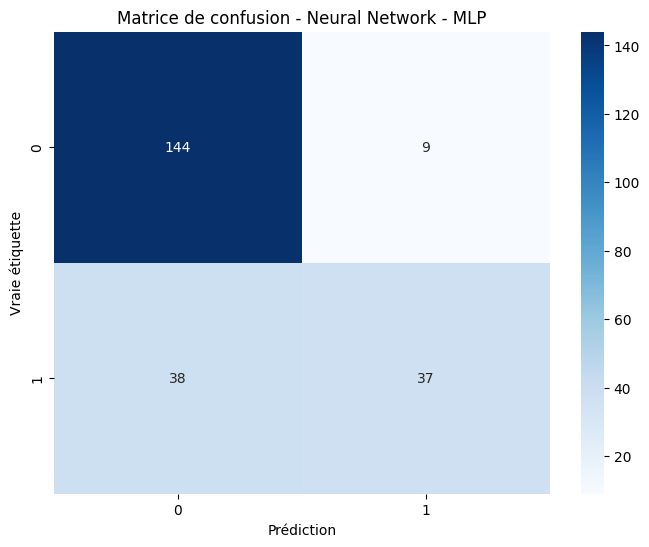

--------------------------------------------------


<Figure size 1200x600 with 0 Axes>

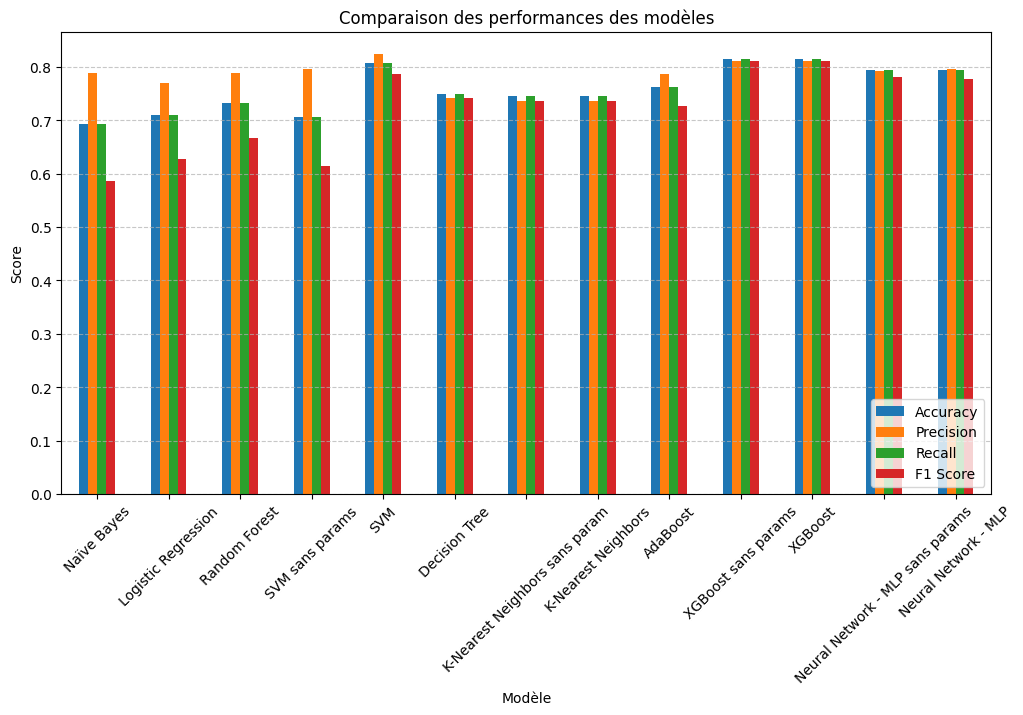

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

scores = {}

models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM sans params": SVC(),
    "SVM": SVC(kernel='sigmoid'),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors sans param": KNeighborsClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost sans params": XGBClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network - MLP sans params": MLPClassifier(),
    "Neural Network - MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    scores[name] = {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1}

    print(f"\n{name} - Accuracy : {acc:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.show()

    print("-" * 50)

df_scores = pd.DataFrame(scores).T
# Affichage des scores sous forme de barres
plt.figure(figsize=(12, 6))
df_scores.plot(kind='bar', figsize=(12, 6))
plt.title("Comparaison des performances des modèles")
plt.xlabel("Modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [33]:
!pip install emoji
import emoji

def convert_emojis(text):
    return emoji.demojize(text)  # Convertit 😊 en :smiling_face_with_smiling_eyes:

df['text'] = df['text'].apply(convert_emojis)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.0 MB/s eta 0:00:00


In [34]:
df.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym :basket...,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [44]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Accuracy : {accuracy_score(y_test, y_pred):.2f}")


Naïve Bayes - Accuracy : 0.69

Logistic Regression - Accuracy : 0.71

Random Forest - Accuracy : 0.74

SVM sans params - Accuracy : 0.71

SVM - Accuracy : 0.81

Decision Tree - Accuracy : 0.74

K-Nearest Neighbors sans param - Accuracy : 0.75

K-Nearest Neighbors - Accuracy : 0.75

AdaBoost - Accuracy : 0.76

XGBoost sans params - Accuracy : 0.82


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Accuracy : 0.82

Neural Network - MLP sans params - Accuracy : 0.79

Neural Network - MLP - Accuracy : 0.79
